# ML 모델 성능 평가

### 분류모델 평가

##### 데이터 준비

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

def fillna(df):
    '''
    결측치 처리
    - Age: 평균치로 대체
    - Cabin: 기본값 'N'으로 대체
    - Embarked: 기본값 'N'으로 대체
    '''
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Cabin'] = df['Cabin'].fillna('N')
    df['Embarked'] = df['Embarked'].fillna('N')

    return df

def drop_feature(df):
    '''
    모델 훈련과 관련 없는 속성 제거
    - PassengerId, Name, Ticket
    '''
    return df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

def encode_feature(df):
    '''
    범주형 데이터를 "숫자"로 인코딩
    - Sex, Cabin, Embarked
    - [tip] Cabin은 각각 다른 문자열 데이터이므로 앞 글자만 가져와서 범주형으로 치환
    '''
    df['Cabin'] = df['Cabin'].str[:1]

    categories = ['Sex', 'Cabin', 'Embarked']

    for cate_item in categories:
        label_encoder = LabelEncoder()
        df[cate_item] = label_encoder.fit_transform(df[cate_item])
        
    return df

def preprocess_data(df):
    '''
    전처리 함수 모두 호출
    '''
    df = drop_feature(df)
    df = fillna(df)
    df = encode_feature(df)
    return df

def scaling_feature(train_data, test_data):
    '''
    특성 스케일링 (정규화)
    '''
    scaler = StandardScaler()
    train_scaled = scaler.fit_transform(train_data)
    test_scaled = scaler.transform(test_data)

    return train_scaled, test_scaled

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('./data/titanic.csv')

# 전처리 함수 호출
df = preprocess_data(df)

# 입력-라벨 데이터 분리
titanic_input = df.drop(['Survived'], axis=1)
titanic_label = df['Survived']

# 훈련-테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(titanic_input, titanic_label, test_size=.2, random_state=0)

# 스케일링 함수 호출
# X_scaled_train, X_scaled_test = scaling_feature(X_train, X_test)

##### 정확도 (Accuracy score)

- 전체 샘플 중에서 올바르게 예측한 샘플의 비율
- 데이터가 불균형한 경우 정확도는 비현실적 성능을 낼 수 있음

In [5]:
# 잘못 학습된 모델 만들어보기
from sklearn.base import BaseEstimator
import numpy as np

# 여성이면 무조건 생존한다고 예측하는 모델
class MyTitanicClassifier(BaseEstimator):
    def fit(self, X, y):
        # 훈련 메서드
        pass

    def predict(self, X):
        # 추론 메서드
        pred = np.zeros((X.shape[0], 1))

        for i in range(X.shape[0]):
            gender = X['Sex'].iloc[i]
            if gender == 0:
                pred[i] = 1

        return pred

In [6]:
from sklearn.metrics import accuracy_score

clf = MyTitanicClassifier()
clf.fit(X_train, y_train)

pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

print("훈련 데이터 정확도:", accuracy_score(y_train, pred_train))
print("평가 데이터 정확도:", accuracy_score(y_test, pred_test))

훈련 데이터 정확도: 0.7865168539325843
평가 데이터 정확도: 0.7877094972067039


##### 혼동 행렬 (Confusion Matrix)

In [7]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [8]:
confusion_matrix(y_test, pred_test)

array([[92, 18],
       [20, 49]])

##### 정밀도 (Precision)

- 양성이라고 예측한 것(TP + FP) 중에 실제 양성(TP)의 비율

In [9]:
print(49 / (49 + 18))

p_score = precision_score(y_test, pred_test)
p_score

0.7313432835820896


0.7313432835820896

##### 재현율 (Recall)

- 실제 양성인 것(TP + FN) 중에 제대로 예측(TP)한 비율

In [10]:
r_score = recall_score(y_test, pred_test)
r_score

0.7101449275362319

---

In [11]:
# 두번째 잘못 학습된 모델 만들어보기

# 무조건 사망한다고 예측하는 모델
class MyDeathClassifier(BaseEstimator):
    def fit(self, X, y):
        # 훈련 메서드
        pass

    def predict(self, X):
        # 추론 메서드
        pred = np.zeros((X.shape[0], 1))
        return pred

# 분류모델 평가 지표 출력 함수
def evaluate_binary_clf(y_true, y_pred):
    print('혼동행렬')
    print(confusion_matrix(y_true, y_pred))
    print(f'정확도 {accuracy_score(y_true, y_pred):.4f} / 정밀도 {precision_score(y_true, y_pred):.4f} / 재현율 {recall_score(y_true, y_pred):.4f}')

In [12]:
clf = MyDeathClassifier()
clf.fit(X_train, y_train)

pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

evaluate_binary_clf(y_train, pred_train)
evaluate_binary_clf(y_test, pred_test)

혼동행렬
[[439   0]
 [273   0]]
정확도 0.6166 / 정밀도 0.0000 / 재현율 0.0000
혼동행렬
[[110   0]
 [ 69   0]]
정확도 0.6145 / 정밀도 0.0000 / 재현율 0.0000


c:\Users\Playdata\AppData\Local\miniconda3\envs\mlstudy_env\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Playdata\AppData\Local\miniconda3\envs\mlstudy_env\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [13]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

pred_train = lr_clf.predict(X_train)
pred_test = lr_clf.predict(X_test)

evaluate_binary_clf(y_train, pred_train)
evaluate_binary_clf(y_test, pred_test)

혼동행렬
[[374  65]
 [ 83 190]]
정확도 0.7921 / 정밀도 0.7451 / 재현율 0.6960
혼동행렬
[[92 18]
 [16 53]]
정확도 0.8101 / 정밀도 0.7465 / 재현율 0.7681


c:\Users\Playdata\AppData\Local\miniconda3\envs\mlstudy_env\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### 정밀도와 재현율의 trade-off

**[ Threshold: 분류 결정 임계치 ]**

- Threshold 낮아지면? Positive로 예측할 확률이 높아진다!
    - 정밀도는 낮아지고, 재현율이 높아진다.

- Threshold 높아지면? Positive로 예측할 확률이 낮아진다!
    - 정밀도는 높아지고, 재현율이 낮아진다.

In [14]:
pred_proba = lr_clf.predict_proba(X_test)
print(pred_proba[:5])

print(pred_test[:5])

[[0.85354617 0.14645383]
 [0.89352977 0.10647023]
 [0.93331473 0.06668527]
 [0.05408255 0.94591745]
 [0.31440041 0.68559959]]
[0 0 0 1 1]


In [15]:
from sklearn.preprocessing import Binarizer

temp_X = [[1, -1, 2], [2, 0, 0.8], [0, 1.1, 1.2]]

# Binarier(threshold)
# - threshold보다 크면 1로 변환
# - threshold보다 작거나 같으면 0로 변환
binarizer = Binarizer(threshold=1)
binarizer.fit_transform(temp_X)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 1.]])

In [16]:
pred_proba = lr_clf.predict_proba(X_test)
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

thresholds = [0.1, 0.3, 0.5, 0.6, 0.8]

for threshold in thresholds:
    binarizer = Binarizer(threshold=threshold)
    custom_pred = binarizer.fit_transform(pred_proba_1)
    evaluate_binary_clf(y_test, custom_pred)

혼동행렬
[[20 90]
 [ 3 66]]
정확도 0.4804 / 정밀도 0.4231 / 재현율 0.9565
혼동행렬
[[82 28]
 [10 59]]
정확도 0.7877 / 정밀도 0.6782 / 재현율 0.8551
혼동행렬
[[92 18]
 [16 53]]
정확도 0.8101 / 정밀도 0.7465 / 재현율 0.7681
혼동행렬
[[99 11]
 [25 44]]
정확도 0.7989 / 정밀도 0.8000 / 재현율 0.6377
혼동행렬
[[110   0]
 [ 39  30]]
정확도 0.7821 / 정밀도 1.0000 / 재현율 0.4348


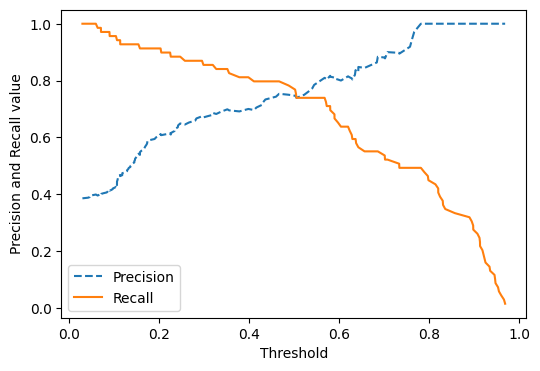

In [17]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_1)

plt.figure(figsize=(6, 4))
plt.plot(thresholds, precisions[:-1], linestyle='--', label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision and Recall value')
plt.legend()
plt.show()

In [18]:
# 정밀도와 재현율에 추가된 마지막 값은 극단적 임계값 설정에 대한 계산 결과
# - 정밀도는 마지막에 1 추가 (임계값이 매우 낮아 모든 샘플이 양성으로 예측된 경우)
# - 재현율은 마지막에 0 추가 (임계값이 매우 높아 모든 샘플이 음성으로 예측된 경우)

precisions.shape, recalls.shape, thresholds.shape

((173,), (173,), (172,))

##### F1-score

- 정밀도와 재현율을 결합한 지표

In [19]:
from sklearn.metrics import f1_score

# 분류모델 평가 지표 출력 함수
def evaluate_binary_clf(y_true, y_pred):
    print('혼동행렬')
    print(confusion_matrix(y_true, y_pred))
    print(f'정확도 {accuracy_score(y_true, y_pred):.4f} / 정밀도 {precision_score(y_true, y_pred):.4f} / 재현율 {recall_score(y_true, y_pred):.4f} / F1 {f1_score(y_true, y_pred):.4f}')

In [20]:
pred_proba = lr_clf.predict_proba(X_test)
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

thresholds = [0.1, 0.3, 0.5, 0.6, 0.8]

for threshold in thresholds:
    binarizer = Binarizer(threshold=threshold)
    custom_pred = binarizer.fit_transform(pred_proba_1)
    evaluate_binary_clf(y_test, custom_pred)

혼동행렬
[[20 90]
 [ 3 66]]
정확도 0.4804 / 정밀도 0.4231 / 재현율 0.9565 / F1 0.5867
혼동행렬
[[82 28]
 [10 59]]
정확도 0.7877 / 정밀도 0.6782 / 재현율 0.8551 / F1 0.7564
혼동행렬
[[92 18]
 [16 53]]
정확도 0.8101 / 정밀도 0.7465 / 재현율 0.7681 / F1 0.7571
혼동행렬
[[99 11]
 [25 44]]
정확도 0.7989 / 정밀도 0.8000 / 재현율 0.6377 / F1 0.7097
혼동행렬
[[110   0]
 [ 39  30]]
정확도 0.7821 / 정밀도 1.0000 / 재현율 0.4348 / F1 0.6061


##### ROC Curve - AUC

- ROC Curve (Receiver Operation Characteristic Curve, 수신자 조작 특성 커브)
    - x축: FPR (False Positive Rate), 실제 음성을 잘못 예측한 비율
        - FPR = FP / (FP + TN)
    - y축: TPR (True Positive Rate), recall score
        - TPR = TP / (FN + TP)

- AUC (Area Under Curve): ROC curve 아래 면적 (1에 가까울수록 좋은 성능을 의미)

In [21]:
from sklearn.metrics import roc_curve

y_true_sample = np.array([0, 0, 1, 1])
y_pred_sample = np.array([0.1, 0.4, 0.35, 0.8])

fpr, tpr, thresholds = roc_curve(y_true_sample, y_pred_sample)
fpr, tpr, thresholds

(array([0. , 0. , 0.5, 0.5, 1. ]),
 array([0. , 0.5, 0.5, 1. , 1. ]),
 array([ inf, 0.8 , 0.4 , 0.35, 0.1 ]))

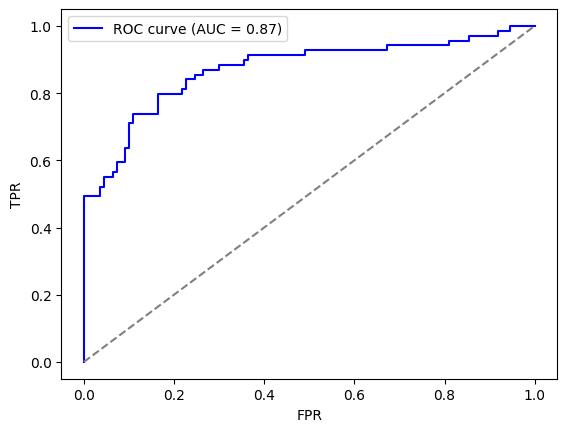

In [22]:
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(y_test, pred_proba_1)

plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

### 회귀모델 평가

In [23]:
# 샘플 데이터
y_true = [3, 0.5, 2, 7]
y_pred = [2.5, 0, 2, 9]

In [24]:
from sklearn.metrics import mean_squared_error          # MSE (평균 제곱 오차)
from sklearn.metrics import root_mean_squared_error     # RMSE (평균 제곱 오차 제곱근)
from sklearn.metrics import mean_absolute_error         # MAE (평균 절대 오차)
from sklearn.metrics import mean_squared_log_error      # MSLE (평균 제곱 로그 오차)
from sklearn.metrics import root_mean_squared_log_error # RMSLE (평균 제곱 로그 오차 제곱근)
from sklearn.metrics import r2_score                    # R2 (결정계수)

print(mean_squared_error(y_true, y_pred))
print(root_mean_squared_error(y_true, y_pred))
print(mean_absolute_error(y_true, y_pred))
print(mean_squared_log_error(y_true, y_pred))
print(root_mean_squared_log_error(y_true, y_pred))
print(r2_score(y_true, y_pred))

1.125
1.0606601717798212
0.75
0.058006407800631835
0.2408451946803835
0.8059299191374663


### [한번 해보기] 농어 무게 예측 모델 비교

- 농어의 길이, 높이, 너비값을 사용해 무게를 예측하는 문제를 최근접이웃모델과 선형회귀모델로 해결해보세요.
- 성능 평가 지표로는 평균제곱오차(MSE), 평균절대오차(MAE), 제곱평균제곱근오차(RMSE), 평균제곱로그오차(MSLE), 제곱평균제곱근로그오차(RMSLE), 결정계수(R²)를 사용하고, 결과를 출력하세요.

In [25]:
perch_df = pd.read_csv('./data/perch_full.csv')

perch_weight = np.array([
    5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
    110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
    130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
    197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
    514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
    820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
    1000.0, 1000.0])

perch_full = perch_df.to_numpy()

In [26]:
# 훈련-테스트 데이터 분리

In [27]:
# 특성 스케일링

In [28]:
# 평가함수 정의 (MSE, MAE, RMSE, MSLE, RMSLE, R2 계산 및 출력)

In [29]:
# 모델 학습 및 평가